In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

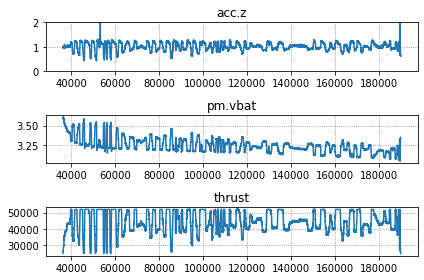

In [2]:
# data = pd.read_csv("data1.csv") 
# data = pd.read_csv("data2.csv") 
data = pd.read_csv("data3.csv") 
# Preview the first 5 lines of the loaded data 
data.head()
data.iloc[0]
data = data.drop(data[(data["stabilizer.thrust"]<25000)].index)

##
fig = plt.figure()

plt.subplot(3,1,1)
plt.plot(data["Timestamp"],data["acc.z"])
plt.grid(color='gray', linestyle=':')
plt.title("acc.z")
plt.ylim(0, 2)

plt.subplot(3,1,2)
plt.plot(data["Timestamp"],data["pm.vbat"])
plt.grid(color='gray', linestyle=':')
plt.title("pm.vbat")

plt.subplot(3,1,3)
plt.plot(data["Timestamp"],data["stabilizer.thrust"])
plt.grid(color='gray', linestyle=':')
plt.title("thrust")

plt.tight_layout()
plt.show()

In [3]:
poly_degree = 1

# X = np.array(data[["acc.z", "pm.vbat"]].values)
# X = np.array(data[["acc.z"]].values)
X = data["acc.z"].values*data["pm.vbat"].values
X = np.array(X.reshape(X.shape[0], 1))

Y = np.array(data["stabilizer.thrust"].values)
Y = Y.reshape(Y.shape[0], -1)

poly = PolynomialFeatures(degree=poly_degree)
poly_x = poly.fit_transform(X)
poly_y = Y

regressor=LinearRegression()
regressor.fit(poly_x,poly_y)

pred_y = regressor.predict(poly_x)

print(regressor.coef_)
print(regressor.intercept_)

[[    0.       10409.572312]]
[10599.81853824]


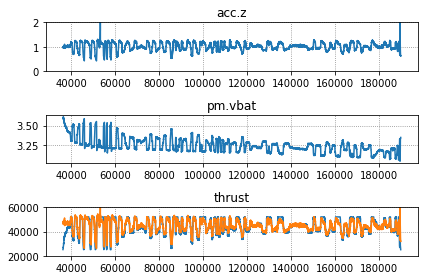

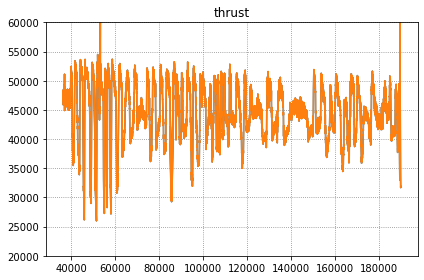

In [4]:
pred_y2 = regressor.intercept_ + regressor.coef_[0,0]*1 + regressor.coef_[0,1]*X[:,0] #+ regressor.coef_[0,2]*X[:,0] + regressor.coef_[0,3]*(X[:,0]**2) + regressor.coef_[0,4]*(X[:,0]*X[:,1])  + regressor.coef_[0,5]*(X[:,1]**2)
# pred_y2 = regressor.intercept_+regressor.coef_[0,0]*1 + regressor.coef_[0,1]*X[:,0] + regressor.coef_[0,2]*X[:,0]**2

fig = plt.figure()

##
plt.subplot(3,1,1)
plt.plot(data["Timestamp"],data["acc.z"])
plt.grid(color='gray', linestyle=':')
plt.title("acc.z")
plt.ylim(0, 2)

plt.subplot(3,1,2)
plt.plot(data["Timestamp"],data["pm.vbat"])
plt.grid(color='gray', linestyle=':')
plt.title("pm.vbat")

plt.subplot(3,1,3)
plt.plot(data["Timestamp"],data["stabilizer.thrust"])
plt.plot(data["Timestamp"],pred_y)
plt.ylim(20000, 60000)
plt.grid(color='gray', linestyle=':')
plt.title("thrust")

plt.tight_layout()
plt.show()


fig = plt.figure()
plt.plot(data["Timestamp"],pred_y)
plt.plot(data["Timestamp"],pred_y2)
plt.grid(color='gray', linestyle=':')
plt.title("thrust")
plt.ylim(20000, 60000)
plt.tight_layout()
plt.show()


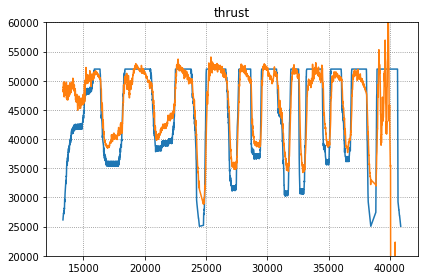

In [5]:
# data = pd.read_csv("data1.csv") 
data = pd.read_csv("data2.csv") 
# data = pd.read_csv("data3.csv") 
# Preview the first 5 lines of the loaded data 
data.head()
data.iloc[0]
data = data.drop(data[(data["stabilizer.thrust"]<25000)].index)

# X = np.array(data[["acc.z", "pm.vbat"]].values)
X = data["acc.z"].values*data["pm.vbat"].values
X = np.array(X.reshape(X.shape[0], 1))
Y = np.array(data["stabilizer.thrust"].values)

pred_y2 = regressor.intercept_ + regressor.coef_[0,0]*1 + regressor.coef_[0,1]*X[:,0] #+ regressor.coef_[0,2]*X[:,0] + regressor.coef_[0,3]*(X[:,0]**2) + regressor.coef_[0,4]*(X[:,0]*X[:,1])  + regressor.coef_[0,5]*(X[:,1]**2)
# pred_y2 = regressor.intercept_+regressor.coef_[0,0]*1 + regressor.coef_[0,1]*X[:,0] + regressor.coef_[0,2]*X[:,0]**2

plt.plot(data["Timestamp"],data["stabilizer.thrust"])
plt.plot(data["Timestamp"],pred_y2)
plt.ylim(20000, 60000)
plt.grid(color='gray', linestyle=':')
plt.title("thrust")

plt.tight_layout()
plt.show()